<a href="https://colab.research.google.com/github/aidenmcateer/Predicting-Premier-League-Football-Match-Outcomes/blob/main/Football_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Football New Dataset.xlsx')
display(df.head())

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
0,E0,2019-08-09,20:00:00,Liverpool,Norwich,4,1,H,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2019-08-10,12:30:00,West Ham,Man City,0,5,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2019-08-10,15:00:00,Bournemouth,Sheffield United,1,1,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2019-08-10,15:00:00,Burnley,Southampton,3,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2019-08-10,15:00:00,Crystal Palace,Everton,0,0,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ar_column_index = df.columns.get_loc('AR')
df = df.iloc[:, :ar_column_index + 1]
display(df.head())

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2019-08-09,20:00:00,Liverpool,Norwich,4,1,H,4,0,...,7,5,9,9,11,2,0,2,0,0
1,E0,2019-08-10,12:30:00,West Ham,Man City,0,5,A,0,1,...,3,9,6,13,1,1,2,2,0,0
2,E0,2019-08-10,15:00:00,Bournemouth,Sheffield United,1,1,D,0,0,...,3,3,10,19,3,4,2,1,0,0
3,E0,2019-08-10,15:00:00,Burnley,Southampton,3,0,H,0,0,...,4,3,6,12,2,7,0,0,0,0
4,E0,2019-08-10,15:00:00,Crystal Palace,Everton,0,0,D,0,0,...,2,3,16,14,6,2,2,1,0,1


In [ ]:
ftr_distribution = df['FTR'].value_counts()
display(ftr_distribution)

,count
FTR,
H,998
A,764
D,528


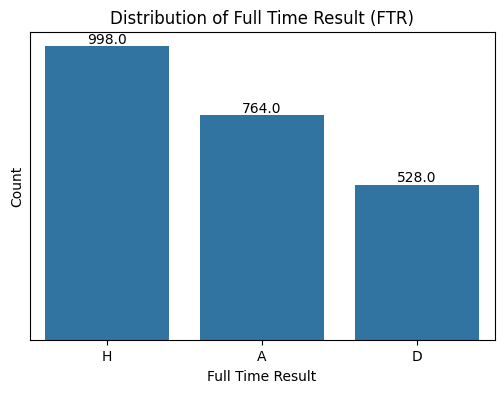

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='FTR', data=df)
plt.title('Distribution of Full Time Result (FTR)')
plt.xlabel('Full Time Result')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set_yticks([])
ax.set_yticklabels([])

plt.show()

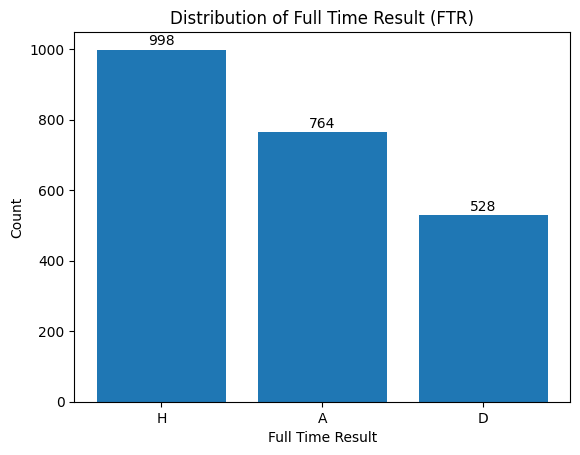

In [ ]:
import matplotlib.pyplot as plt

ftr_distribution = df['FTR'].value_counts()

bars = plt.bar(ftr_distribution.index, ftr_distribution.values)

plt.title('Distribution of Full Time Result (FTR)')
plt.xlabel('Full Time Result')
plt.ylabel('Count')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height),
             ha='center', va='bottom')

plt.show()

In [ ]:
home_team_ftr = df.groupby('HomeTeam')['FTR'].value_counts().unstack(fill_value=0)
display(home_team_ftr)

FTR,A,D,H
HomeTeam,,,
Arsenal,20,23,71
Aston Villa,34,26,55
Bournemouth,30,20,26
Brentford,24,21,31
Brighton,33,42,40
Burnley,37,20,19
Chelsea,24,33,58
Crystal Palace,38,36,40
Everton,43,29,42


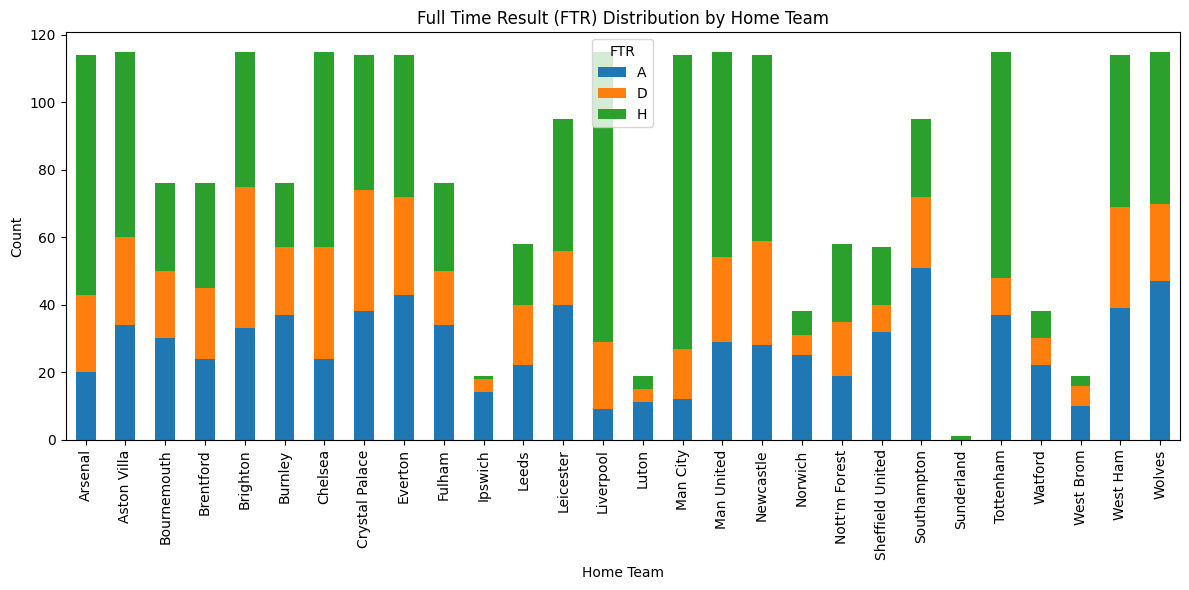

In [ ]:
home_team_ftr.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Full Time Result (FTR) Distribution by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='FTR')
plt.tight_layout()
plt.show()

In [ ]:
correlation_htr_ftr = df.groupby(['HTR', 'FTR']).size().unstack(fill_value=0)
display(correlation_htr_ftr)

FTR,A,D,H
HTR,,,
A,438,100,72
D,267,296,320
H,59,132,606


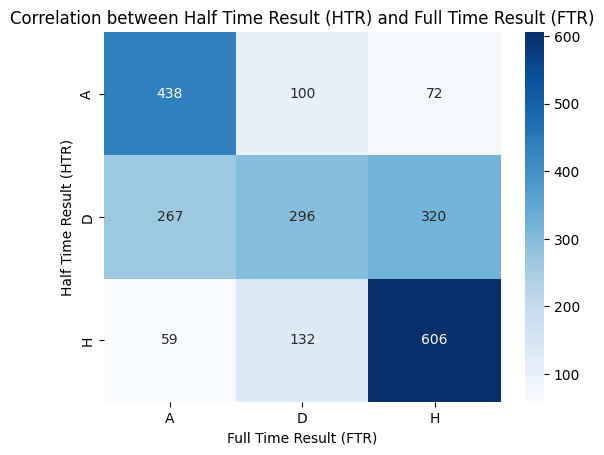

In [ ]:
sns.heatmap(correlation_htr_ftr, annot=True, fmt='d', cmap='Blues')
plt.title('Correlation between Half Time Result (HTR) and Full Time Result (FTR)')
plt.xlabel('Full Time Result (FTR)')
plt.ylabel('Half Time Result (HTR)')
plt.show()

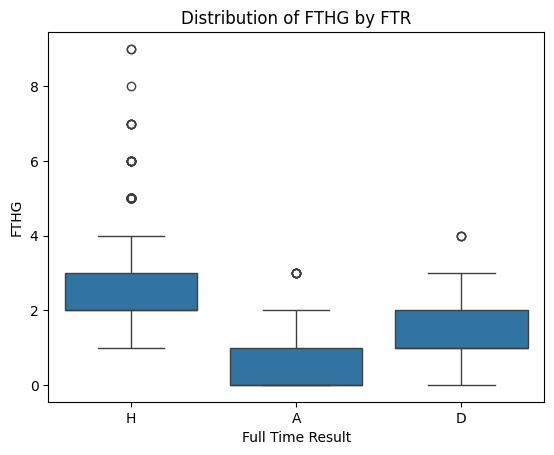

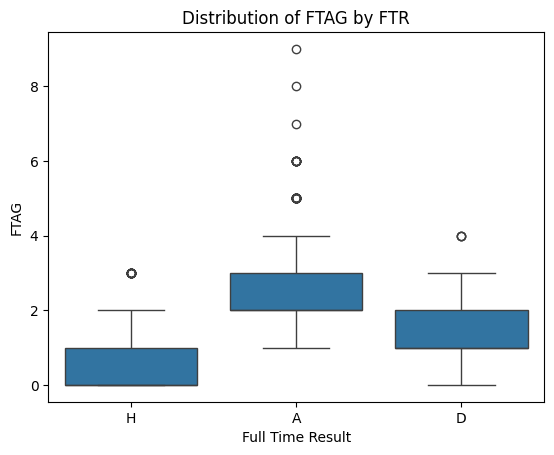

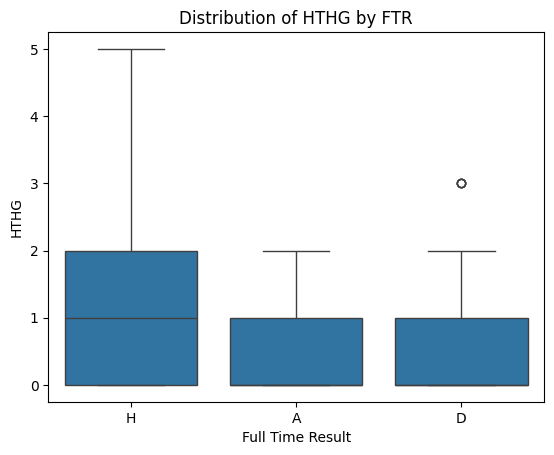

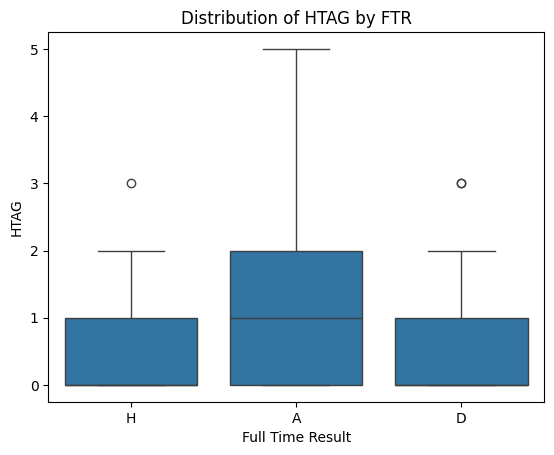

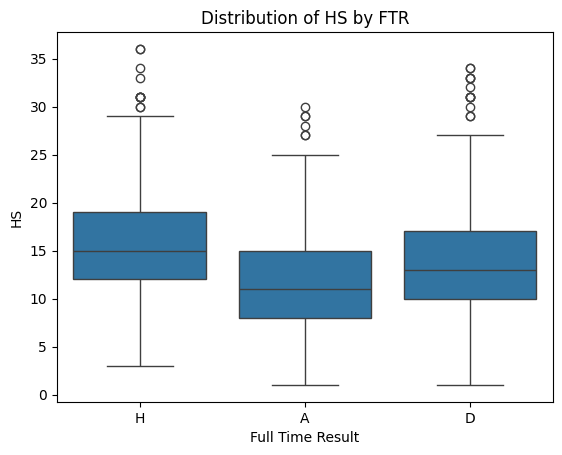

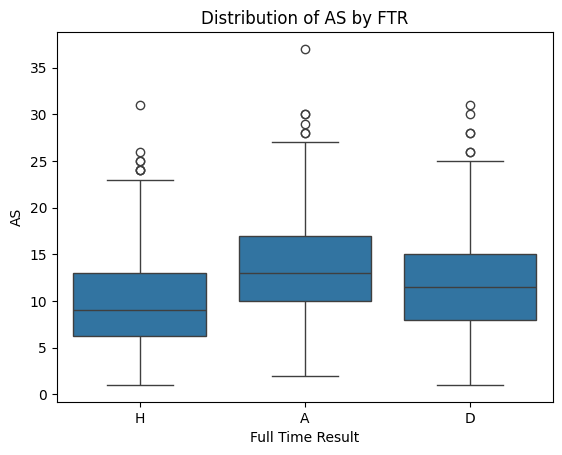

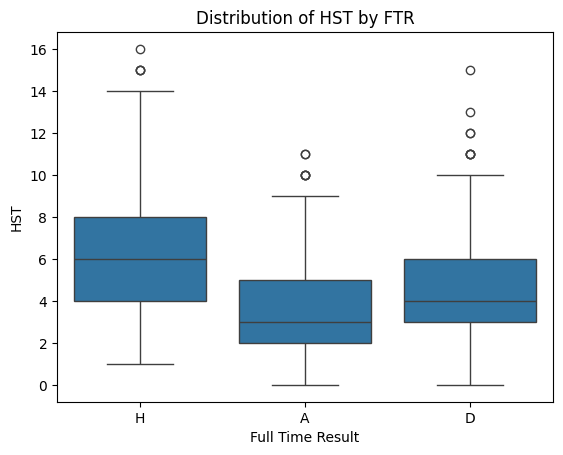

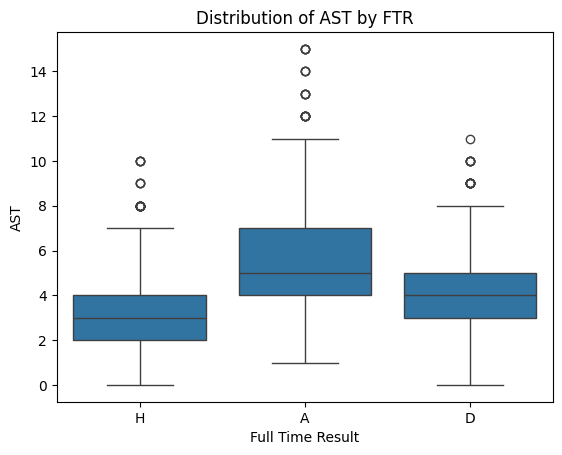

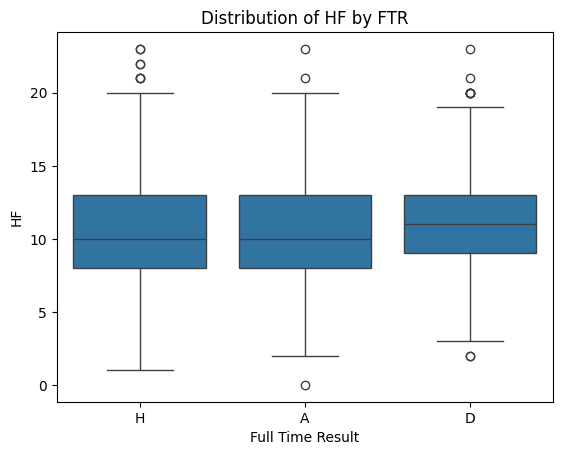

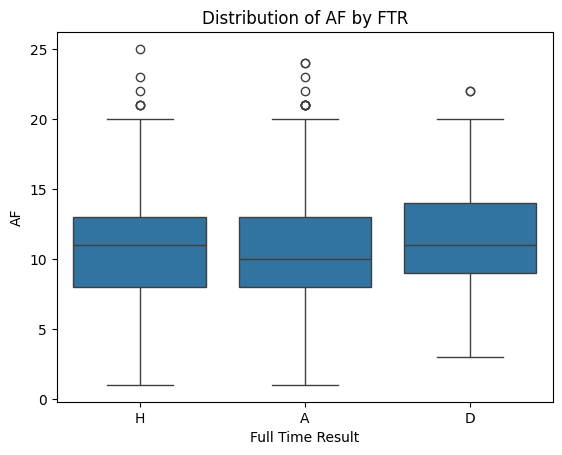

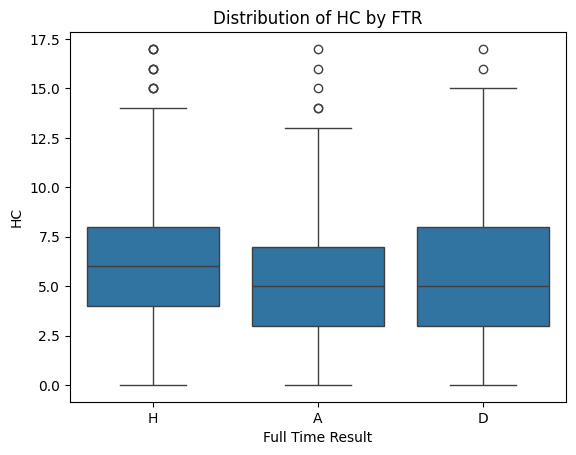

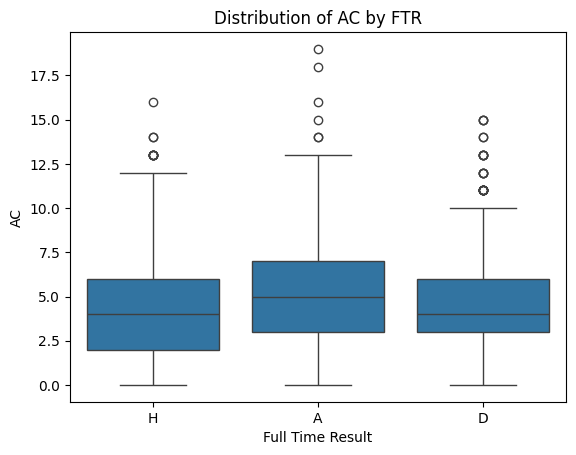

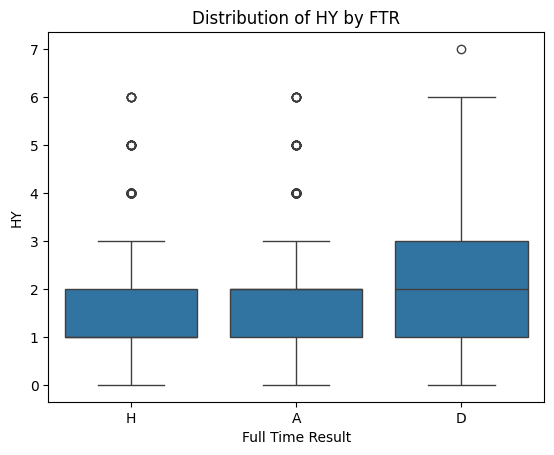

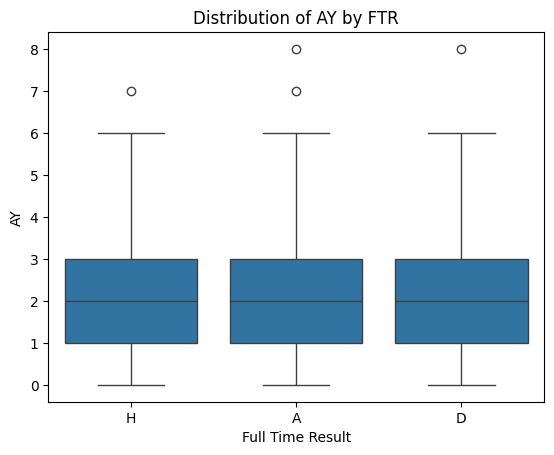

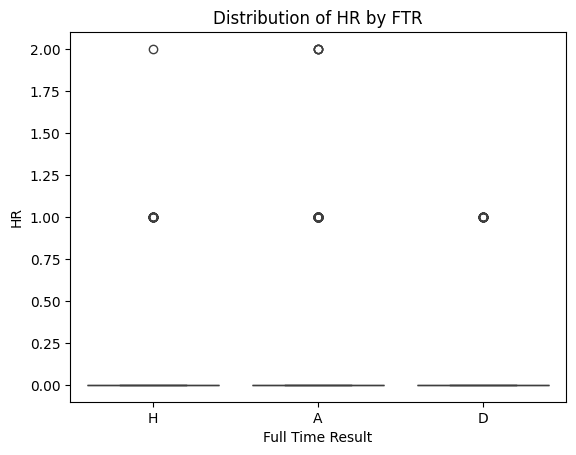

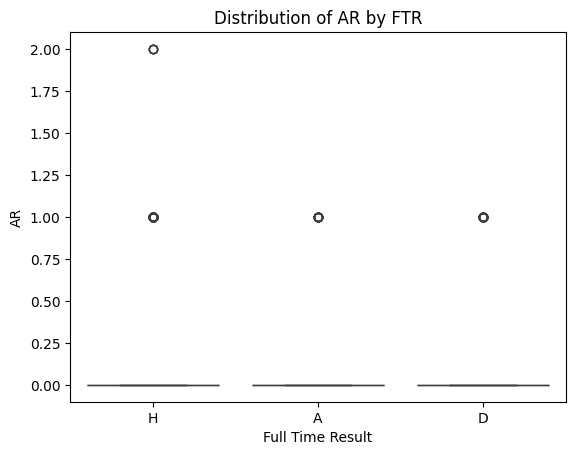

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    sns.boxplot(x='FTR', y=col, data=df)
    plt.title(f'Distribution of {col} by FTR')
    plt.xlabel('Full Time Result')
    plt.ylabel(col)
    plt.show()

In [ ]:
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.head())

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2019-08-09,20:00:00,Liverpool,Norwich,4,1,H,4,0,...,7,5,9,9,11,2,0,2,0,0
1,E0,2019-08-10,12:30:00,West Ham,Man City,0,5,A,0,1,...,3,9,6,13,1,1,2,2,0,0
2,E0,2019-08-10,15:00:00,Bournemouth,Sheffield United,1,1,D,0,0,...,3,3,10,19,3,4,2,1,0,0
3,E0,2019-08-10,15:00:00,Burnley,Southampton,3,0,H,0,0,...,4,3,6,12,2,7,0,0,0,0
4,E0,2019-08-10,15:00:00,Crystal Palace,Everton,0,0,D,0,0,...,2,3,16,14,6,2,2,1,0,1


In [ ]:
import pandas as pd

def assign_points(row, team):
    if row['HomeTeam'] == team:
        return 3 if row['FTR'] == 'H' else 1 if row['FTR'] == 'D' else 0
    else:
        return 3 if row['FTR'] == 'A' else 1 if row['FTR'] == 'D' else 0

all_teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()

team_form_ratings = {}

for team in all_teams:
    team_games = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].sort_values(by='Date', ascending=False).head(6)
    points_series = team_games.apply(lambda row: assign_points(row, team), axis=1)
    team_form_ratings[team] = points_series.sum()

team_form_df = pd.DataFrame(list(team_form_ratings.items()), columns=['Team', 'FormRating'])

team_form_df.sort_values(by='FormRating', ascending=False, inplace=True)
team_form_df.reset_index(drop=True, inplace=True)

display(team_form_df.head(10))

,Team,FormRating
0,Man City,16
1,Brighton,14
2,Chelsea,13
3,Arsenal,11
4,Crystal Palace,10
5,Brentford,10
6,Everton,10
7,Aston Villa,10
8,Nott'm Forest,8
9,Liverpool,8


In [ ]:
df_model = df[['HTR', 'HST', 'AST', 'FTR']].copy()

df['HomeTeamForm'] = df['HomeTeam'].map(team_form_ratings)
df['AwayTeamForm'] = df['AwayTeam'].map(team_form_ratings)

df_model['FormDifference'] = df['HomeTeamForm'] - df['AwayTeamForm']

df_model = pd.get_dummies(df_model, columns=['HTR'], prefix='HTR', drop_first=True)

display(df_model.head())

,HST,AST,FTR,FormDifference,HTR_D,HTR_H
0,7,5,H,7,False,True
1,3,9,A,-9,False,False
2,3,3,D,7,True,False
3,4,3,H,2,True,False
4,2,3,D,0,True,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df_model.drop('FTR', axis=1)
y = df_model['FTR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTesting set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (1832, 5)
y_train: (1832,)

Testing set shapes:
X_test: (458, 5)
y_test: (458,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nMetrics per class:")
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6201

Metrics per class:
[0.66272189 0.37634409 0.69897959]
[0.7        0.3271028  0.71727749]
[0.68085106 0.35       0.70801034]

Classification Report:
              precision    recall  f1-score   support

           A       0.66      0.70      0.68       160
           D       0.38      0.33      0.35       107
           H       0.70      0.72      0.71       191

    accuracy                           0.62       458
   macro avg       0.58      0.58      0.58       458
weighted avg       0.61      0.62      0.61       458



In [ ]:
everton_form = team_form_ratings.get('Everton', 0)
liverpool_form = team_form_ratings.get('Liverpool', 0)

input_data = {
    'HST': [3],
    'AST': [5],
    'FormDifference': [everton_form - liverpool_form],
    'HTR_D': [False],
    'HTR_H': [True]
}

input_df = pd.DataFrame(input_data)

input_df = input_df[X_train.columns]


predicted_ftr = model.predict(input_df)

print(f"Predicted Full Time Result (FTR): {predicted_ftr[0]}")

Predicted Full Time Result (FTR): D
